In [1]:
import pandas as pd
import math
import numpy as np
from datetime import datetime as dt

In [2]:
import pandas as pd
import math
import numpy as np
from datetime import datetime as dt
df_cities = pd.read_csv("cities.csv")
df_stations = pd.read_csv("stations.csv")
df_tickets=pd.read_csv("ticket_data.csv")
df_providers=pd.read_csv("providers.csv")

#we are going to use this dataframe to store data and visualize it after
df_data = pd.DataFrame(columns = ['price_in_cents','duration','transport','distance'])

In [3]:
len(df_cities),len(df_providers),len(df_stations),len(df_tickets)

(8040, 227, 11035, 74168)

In [4]:
# this function helps us get the distance between 2 coordinates points on earth map.

def dist_cities(la1,lon1,la2,lon2):
    R = 6373.0 #radius of the Earth

    lat1 = math.radians(la1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(la2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

In [5]:
df_cities.columns

Index(['id', 'local_name', 'unique_name', 'latitude', 'longitude',
       'population'],
      dtype='object')

In [6]:
df_tickets.columns

Index(['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_cents', 'search_ts', 'middle_stations', 'other_companies',
       'o_city', 'd_city'],
      dtype='object')

# PRIX MOYEN

In [8]:
x=0
i=0
for i in range(len(df_tickets)):
    x=x+df_tickets['price_in_cents'][i]
print("le prix moyen en centime :" ,x/len(df_tickets))

#ou on peut utiliser directement la fonction "mean" de numpy

le prix moyen en centime : 4382.711061374178


# PRIX MIN

In [10]:
min(df_tickets['price_in_cents'])

300

# PRIX MAX


In [12]:
max(df_tickets['price_in_cents'])

38550

In [13]:
i=0
list_time=[]
for i in range(len(df_tickets)):
    list_time.append(dt.strptime(df_tickets['arrival_ts'][i],"%Y-%m-%d %H:%M:%S+%f")-dt.strptime(df_tickets['departure_ts'][i],"%Y-%m-%d %H:%M:%S+%f"))

In [14]:
min(list_time)

datetime.timedelta(seconds=1200)

In [15]:
max(list_time)

datetime.timedelta(days=20, seconds=46260)

# TEMPS MAX Pour touts les voyages figurant sur le fichier "tickets_data"

In [16]:

import datetime
print("durée maximum:", str(datetime.timedelta(seconds=max(list_time).total_seconds())))

durée maximum: 20 days, 12:51:00


# TEMPS MIN Pour touts les voyages figurant sur le fichier "tickets_data"

In [17]:
import datetime
print("durée minimum:", str(datetime.timedelta(seconds=min(list_time).total_seconds())))

durée minimum: 0:20:00


# TEMPS Moyen Pour touts les voyages figurant sur le fichier "tickets_data"

In [18]:
from numpy.core.fromnumeric import mean
import datetime
print("durée moyenne:", str(datetime.timedelta(seconds=mean(list_time).total_seconds())))

durée moyenne: 7:04:37.247600


In [19]:
df_tickets.columns

Index(['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_cents', 'search_ts', 'middle_stations', 'other_companies',
       'o_city', 'd_city'],
      dtype='object')

# Statistiques Des prix par trajets (trajet unique de station à une station, groupby)

In [20]:
df=df_tickets.groupby(['o_station','d_station'])

In [21]:
#max(df['price_in_cents'])
min(df['price_in_cents'])

((3.0, 39.0), 45116    1200
 45117    1590
 45137    1600
 45149    3080
 45159    2480
 53641    3480
 Name: price_in_cents, dtype: int64)

In [22]:
max(df['price_in_cents'])

((11017.0, 10349.0), 652    5300
 Name: price_in_cents, dtype: int64)

In [25]:
maximums = df.max('price_in_cents')

# Prix Max trajet

In [26]:
maximums

id  company  price_in_cents  o_city  d_city
o_station d_station                                                  
3.0       39.0       6848666       13            3480     628      37
          61.0       6849450       13            4780     628     173
          123.0      6862926       13            3600     628     144
          132.0      6854174       13            2280     628     158
          189.0      6854672       13            3680     628    5118
...                      ...      ...             ...     ...     ...
11012.0   11010.0    6844505     8387            9600     628     524
11013.0   11005.0    6835755     8387            5000     694     184
11014.0   11005.0    6835756     8387            5000     694     184
11015.0   11005.0    6835757     8387            5000     694     184
11017.0   10349.0    6795677     8387            5300   12166     857

[2666 rows x 5 columns]

# Prix Min par trajet

In [27]:
minimums = df.min('price_in_cents')

In [30]:
minimums.tail(10)

id  company  price_in_cents  o_city  d_city
o_station d_station                                                  
10895.0   6794.0     6856827     8377            1400     885     628
11007.0   11013.0    6832380     8387            8500     272     694
11011.0   11008.0    6819881     8387            6800     628     184
          11010.0    6844368     8387            9600     628     524
11012.0   11008.0    6819883     8387            6800     628     184
          11010.0    6844369     8387            9600     628     524
11013.0   11005.0    6835755     8387            5000     694     184
11014.0   11005.0    6835756     8387            5000     694     184
11015.0   11005.0    6835757     8387            5000     694     184
11017.0   10349.0    6795677     8387            5300   12166     857

# Prix moyen par Trajet

In [31]:
means = df.mean('price_in_cents')

In [32]:
means

id      company  price_in_cents   o_city  d_city
o_station d_station                                                            
3.0       39.0       6.841591e+06    12.333333     2238.333333    628.0    37.0
          61.0       6.849450e+06    13.000000     4780.000000    628.0   173.0
          123.0      6.862926e+06    13.000000     3600.000000    628.0   144.0
          132.0      6.854169e+06    13.000000     2150.000000    628.0   158.0
          189.0      6.854630e+06    13.000000     3680.000000    628.0  5118.0
...                           ...          ...             ...      ...     ...
11012.0   11010.0    6.844437e+06  8387.000000     9600.000000    628.0   524.0
11013.0   11005.0    6.835755e+06  8387.000000     5000.000000    694.0   184.0
11014.0   11005.0    6.835756e+06  8387.000000     5000.000000    694.0   184.0
11015.0   11005.0    6.835757e+06  8387.000000     5000.000000    694.0   184.0
11017.0   10349.0    6.795677e+06  8387.000000     5300.000000  12166.0   857.0

[2666 rows x 5 columns]

# on utilise cette boucle pour avoir une data frame contenant 4 columns pour nous aider à bien comprendre la data et aussi à visualiser

In [33]:

distance=[]
df_tickets.dropna(inplace=True)
df_stations.dropna(inplace=True)
#df_tickets=df_tickets.drop_duplicates(subset=['o_station', 'd_station'], keep='last')

for x,y,z,e in zip(df_tickets['o_station'],df_tickets['d_station'],df_tickets['id'],df_tickets['company']):

  price,=df_tickets.loc[df_tickets['id']==z,'price_in_cents']

  arrival_ts,=df_tickets.loc[df_tickets['id']==z,'arrival_ts']

  departure_ts,=df_tickets.loc[df_tickets['id']==z,'departure_ts']

  duration=dt.strptime(arrival_ts,"%Y-%m-%d %H:%M:%S+%f")-dt.strptime(departure_ts,"%Y-%m-%d %H:%M:%S+%f")

  transport,=df_providers.loc[df_providers['id']==e, 'transport_type']

  o_la, = df_stations.loc[df_stations['id']==x,'latitude']
  o_lon,=df_stations.loc[df_stations['id']==x,'longitude']

  d_la,=df_stations.loc[df_stations['id']==y, 'latitude']
  d_lon,=df_stations.loc[df_stations['id']==y, 'longitude']

  distance=dist_cities(o_la,o_lon,d_la,d_lon)

  df_data = df_data.append({'price_in_cents': price, 'duration':duration,'transport':transport,'distance':distance}, ignore_index=True)

In [ ]:
df_bus=df_data.loc[df_data['transport']=="bus"]

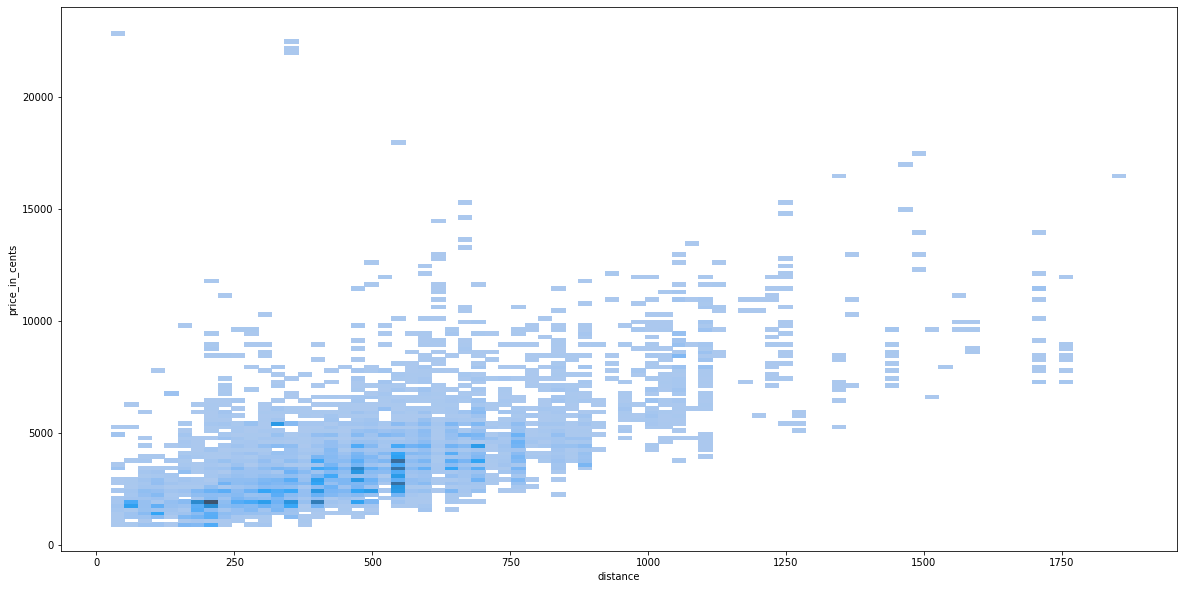

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_bus, x="distance",y="price_in_cents")


# Visualisation des trajets par rapport au nombre d'heure et la distance (0,200,800,2000+)

## on peut voir que pour le train, les voyages ne dépassent pas les 2 heures quelle que soit la distance, et aussi que les voyages en train ne vont pas plus que les ~2000km.

## aussi, si on compare le len du tableau df_train et df_bus, on peut dire que les gens aime voyager en train qu'en bus.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0, '0-200'),
 Text(0, 0, '201-800'),
 Text(0, 0, '800-2000'),
 Text(0, 0, '2000+')]

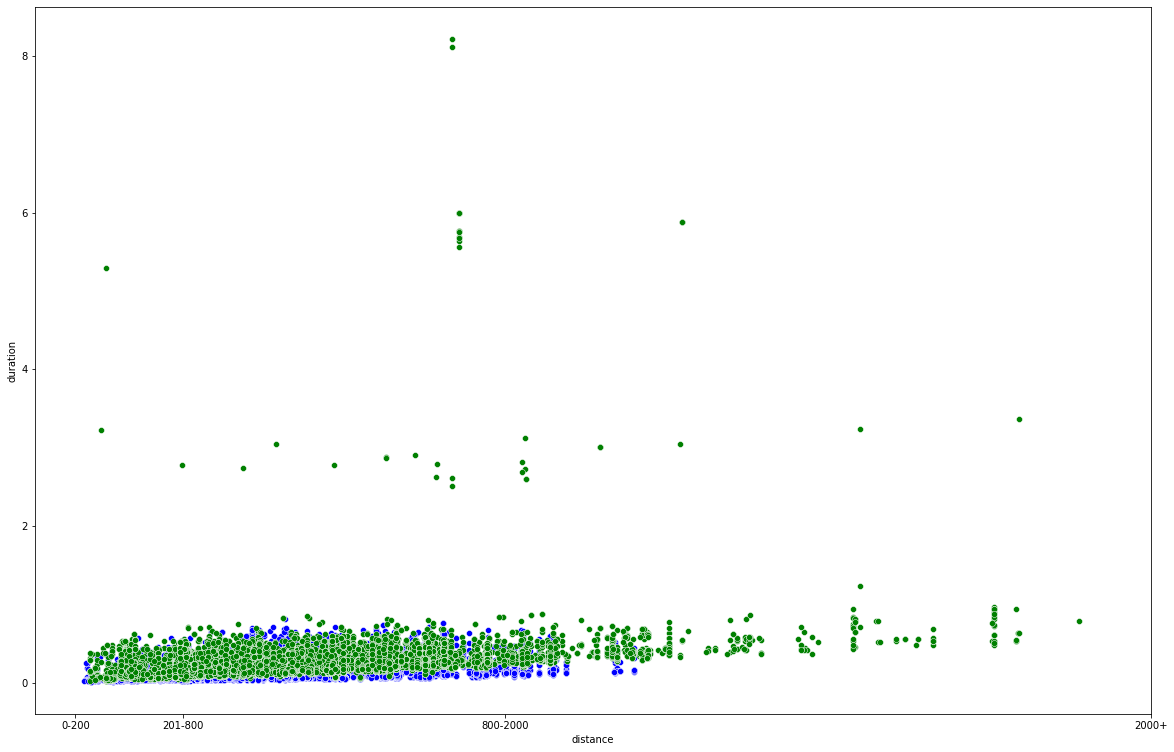

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime

df_bus=df_data.loc[df_data['transport']=="bus"]
df_train=df_data.loc[df_data['transport']=="train"]

df_train['duration']=[((x.total_seconds())/216000) for x in df_train['duration']]
#df_train['duration']=[x/3600*60 for x in df_train['duration']]
df_bus['duration']=[((x.total_seconds())/216000)for x in df_bus['duration']]
#df_bus['duration']=[x/3600*60 for x in df_bus['duration']]
fig_dims = (20, 13)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set(ylim=(0, 1000000))
pp=sns.scatterplot(data=df_train, x="distance",y="duration", color="blue")
pp=sns.scatterplot(data=df_bus, x="distance",y="duration",color="green")

ax.set_xticks([0,200,800,2000])
ax.set_xticklabels(['0-200','201-800','800-2000','2000+'])


# Visualisation des trajets par rapport au prix et la distance (0,200,800,2000+)

## La première remarque c'est que les prix en train sont bien plus élevés qu'en bus.
## et pour le train les prix s'augmentent exponentiellement par rapport au distance, alors que sur le bus les prix sont un peu stable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


[Text(0, 0, '0-200'),
 Text(0, 0, '201-800'),
 Text(0, 0, '800-2000'),
 Text(0, 0, '2000+')]

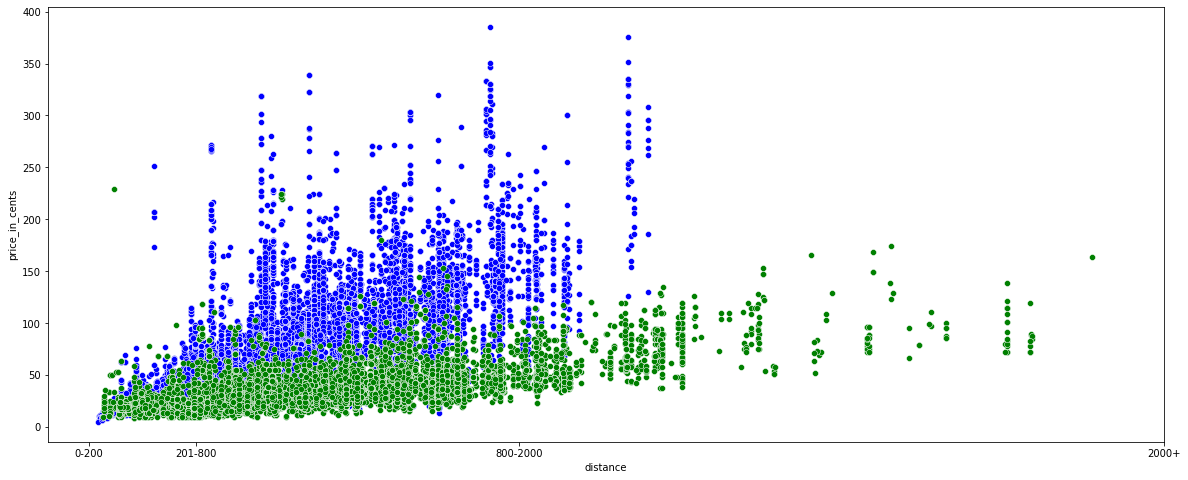

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime


df_bus=df_data.loc[df_data['transport']=="bus"]
df_train=df_data.loc[df_data['transport']=="train"]

df_train['price_in_cents']=[x/100 for x in df_train['price_in_cents']]
#df_train['duration']=[x/60 for x in df_train['duration']]
df_bus['price_in_cents']=[x/100 for x in df_bus['price_in_cents']]
#df_bus['duration']=[x/60 for x in df_bus['duration']]
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set(ylim=(0, 1000000))
pp=sns.scatterplot(data=df_train, x="distance",y="price_in_cents", color="blue")
pp=sns.scatterplot(data=df_bus, x="distance",y="price_in_cents",color="green")

ax.set_xticks([0,200,800,2000])
ax.set_xticklabels(['0-200','201-800','800-2000','2000+'])


In [ ]:
df_tickets=pd.read_csv("ticket_data.csv")

In [ ]:
df_tickets

# Visualisation pour voir les mois où les gens achètent plus de tickets ou bien où les gens voyagent.

## on constate que plus que 90% des tickets ont été achetés le mois d'octobre.


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime

#sns.lineplot(x = "departure_ts", y = "Col_1",
 #            data = df)
def return_month(x):
  temp=datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S+%f')
  final = temp.strftime('%m')
  return final

df_tickets['departure_ts']=[return_month(x) for x in df_tickets['departure_ts']]

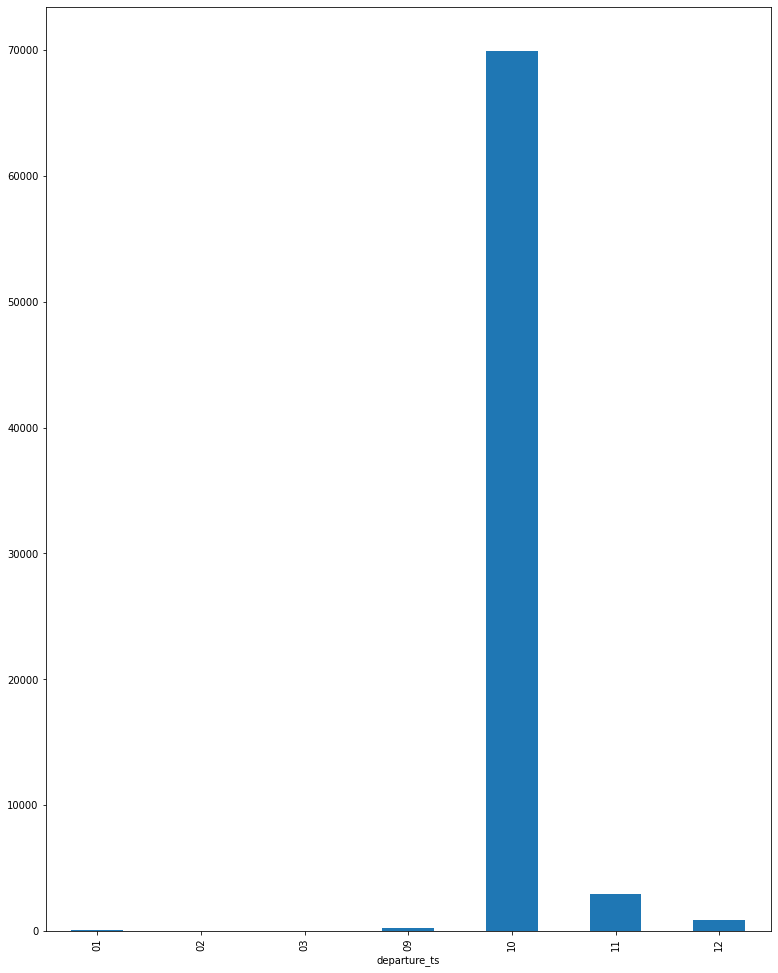

In [52]:
df_tickets.groupby(['departure_ts']).size().plot(figsize=(13,17),kind='bar')

In [53]:
df_tickets=df_tickets.fillna(0)

# on peut créer un model simple pour prédire les prix en fonction du mois, du company, o_station, d_station.


In [55]:
df_tickets

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,0.0,0.0,10,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,0,0,611,542
1,6795026,9,63.0,1044.0,10,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,10,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,10,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,10,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,10,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,10,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,10,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,10,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [56]:
df_new=df_tickets.drop(['id','arrival_ts','search_ts','middle_stations','other_companies'], axis = 1)

In [57]:
df_new

,company,o_station,d_station,departure_ts,price_in_cents,o_city,d_city
0,8385,0.0,0.0,10,4550,611,542
1,9,63.0,1044.0,10,1450,611,542
2,8377,5905.0,6495.0,10,7400,611,542
3,8377,5905.0,6495.0,10,13500,611,542
4,8381,5905.0,6495.0,10,7710,611,542
...,...,...,...,...,...,...,...
74163,13,279.0,10729.0,10,2590,628,562
74164,9,279.0,304.0,10,2700,628,562
74165,8371,10642.0,304.0,10,3000,628,562
74166,13,279.0,304.0,10,2880,628,562


In [58]:
from sklearn.model_selection import train_test_split
 
X = np.array(df_tickets.drop(['id','arrival_ts','search_ts','middle_stations','other_companies','price_in_cents'],1))

In [59]:
y = np.array(df_tickets['price_in_cents'])

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [61]:
# SVM Model
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8162373991991332


# Résultat du model SVM pas mal pour un model qui prends seulement 6 features en input.